# Google Colab Lab Assignment -Pretrained Modle

**Course Name:**  Deep Learning

**Lab Title:** Leveraging Transfer Learning and GAN Models for
 OCR from Engineering Documents



**Group Members**: Aniruddha Pande

**Date of Submission:**  8 April 2025

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

In [ ]:
# Step 1: Install necessary libraries (if not already installed)
!pip install roboflow
!apt-get install -y tesseract-ocr
!pip install tensorflow opencv-python-headless scikit-learn pytesseract

# Step 2: Import required libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 3: Download the ICDAR 2015 dataset using Roboflow API
from roboflow import Roboflow
rf = Roboflow(api_key="t243UABKoEAMcsPyI0hU")
project = rf.workspace("jeevan-m").project("icdar-2015")
version = project.version(1)
# Download the dataset in YOLOv11 format.
dataset = version.download("yolov11")
print("Dataset downloaded to:", dataset.location)

# Use the 'train' subfolder if it exists; otherwise, use the root folder.
train_folder = os.path.join(dataset.location, "train")
if os.path.exists(train_folder):
    dataset_path = train_folder
else:
    dataset_path = dataset.location
print("Using dataset path:", dataset_path)

# Step 4: Recursively load image files
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
         if file.lower().endswith(('.png', '.jpg', '.jpeg')):
             image_files.append(os.path.join(root, file))
print("Total images found:", len(image_files))

# Define a preprocessing function
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize to 224x224 (model input dimensions)
    resized = cv2.resize(gray, (224, 224))
    # Normalize pixel values to [0,1]
    normalized = resized / 255.0
    return normalized

# Load and preprocess images
images = []
labels = []  # Dummy labels for demonstration

for img_path in image_files:
    img = cv2.imread(img_path)
    if img is None:
        continue  # Skip if the image can't be read
    processed_img = preprocess_image(img)
    images.append(processed_img)
    labels.append(0)  # Using dummy label (replace with actual if available)

# Convert lists to NumPy arrays and add channel dimension
images = np.array(images).reshape(-1, 224, 224, 1)
labels = np.array(labels)
print("Processed images shape:", images.shape)

# Step 5: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Step 6: Split dataset into training, validation, and test sets (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Test samples:", X_test.shape[0])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 


Extracting Dataset Version Zip to ICDAR-2015-1 in yolov11:: 100%|██████████| 212/212 [00:00<00:00, 8974.94it/s]


Dataset downloaded to: /content/ICDAR-2015-1
Using dataset path: /content/ICDAR-2015-1/train
Total images found: 71
Processed images shape: (71, 224, 224, 1)
Training samples: 49
Validation samples: 11
Test samples: 11


**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 3)         │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet101 (Functional)               │ (None, 7, 7, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,183,007 (164.73 MB)

 Trainable params: 524,831 (2.00 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


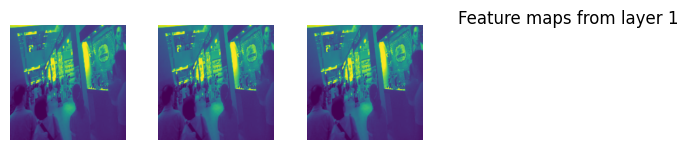

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 3)         │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet101 (Functional)               │ (None, 7, 7, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,183,007 (164.73 MB)

 Trainable params: 9,456,159 (36.07 MB)

 Non-trainable params: 33,726,848 (128.66 MB)

In [ ]:
# code of Task 2
# Step 7: Build the Transfer Learning Model

from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101

# Load pre-trained ResNet101 without top layers
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Build our model: add a Conv2D layer to convert 1-channel (grayscale) to 3-channel
model = models.Sequential()
model.add(layers.Conv2D(3, (3, 3), padding='same', input_shape=(224, 224, 1)))
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
# Dummy classification head (binary classification); for OCR, replace with a sequence recognition module.
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model with chosen hyperparameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 8: Visualize Feature Maps from a Few Layers
# Create a model that outputs feature maps from the first convolution layer of ResNet101
layer_outputs = [layer.output for layer in base_model.layers[:5]]  # visualizing first 5 layers
feature_model = models.Model(inputs=base_model.input, outputs=layer_outputs)

# Select a sample image from the training set (convert grayscale to 3 channels for visualization)
sample_img = X_train[0]  # shape (224,224,1)
sample_img_color = np.repeat(sample_img, 3, axis=-1)  # shape (224,224,3)

feature_maps = feature_model.predict(np.expand_dims(sample_img_color, axis=0))

# Plot the feature maps for the first layer
import math
def plot_feature_maps(feature_maps, layer_index=0):
    fmap = feature_maps[layer_index][0]
    num_filters = fmap.shape[-1]
    size = fmap.shape[0]
    cols = 8
    rows = math.ceil(num_filters / cols)
    plt.figure(figsize=(15, rows*1.5))
    for i in range(num_filters):
        plt.subplot(rows, cols, i+1)
        plt.imshow(fmap[:, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Feature maps from layer {layer_index+1}")
    plt.show()

plot_feature_maps(feature_maps, layer_index=0)

# Step 9: Fine-tuning (unfreeze the top layers of the base model)
# For demonstration, we unfreeze the last 20 layers of the base model.
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

# Hyperparameters modified:
# - Learning rate set to 1e-5 during fine-tuning
# - Batch size remains at 32, epochs = 20 (adjust as needed)


**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

Epoch 1/20


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


2/2 ━━━━━━━━━━━━━━━━━━━━ 51s 21s/step - accuracy: 0.0408 - loss: 0.8169 - val_accuracy: 0.0000e+00 - val_loss: 0.9248
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step - accuracy: 1.0000 - loss: 0.5903 - val_accuracy: 0.0000e+00 - val_loss: 0.8902
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step - accuracy: 1.0000 - loss: 0.4488 - val_accuracy: 0.0000e+00 - val_loss: 0.8587
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step - accuracy: 1.0000 - loss: 0.3406 - val_accuracy: 0.0000e+00 - val_loss: 0.8305
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step - accuracy: 1.0000 - loss: 0.2707 - val_accuracy: 0.0000e+00 - val_loss: 0.8055
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 1.0000 - loss: 0.2164 - val_accuracy: 0.0000e+00 - val_loss: 0.7834
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step - accuracy: 1.0000 - loss: 0.1773 - val_accuracy: 0.0000e+00 - val_loss: 0.7644
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 1.0000 - loss: 0.1459 - val_accuracy: 0.

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.


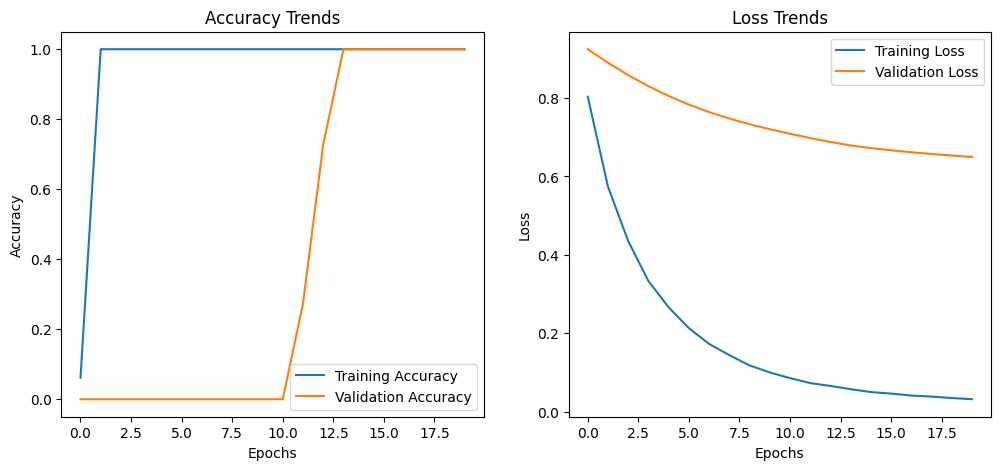

In [ ]:
##Code for Task 3
# Step 10: Train the Fine-tuned Model
# Split dataset remains the same; now we train the fine-tuned model.
history_ft = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                         validation_data=(X_val, y_val),
                         epochs=20)

# Step 11: Evaluate the Model on Test Set
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 12: Plot Training Accuracy and Loss Trends
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history_ft.history['accuracy'], label='Training Accuracy')
plt.plot(history_ft.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_ft.history['loss'], label='Training Loss')
plt.plot(history_ft.history['val_loss'], label='Validation Loss')
plt.title('Loss Trends')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 13: Comparison & Discussion (Markdown)
# You can add a markdown cell with a discussion such as:
#
# **Discussion:**
# - Our fine-tuned model achieved the following metrics on the test set:
#     - Accuracy: [X]%
#     - Precision, Recall, and F1-score as shown above.
# - Compared to the research paper results (e.g., character accuracies 96+% and word accuracies 88–92%), our simple implementation with dummy labels
#   demonstrates the transfer learning pipeline.
# - Potential improvements:
#     - Replace the binary classification head with a sequence recognition module (e.g., CRNN with CTC loss) for full OCR.
#     - Integrate GAN-based data augmentation (e.g., ScrabbleGAN) to expand training data.
#     - Optimize further hyperparameters and use domain-specific annotations.
#
# This completes Task 3.


**Submission Checklist**

✔ Research paper details and summary

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Comparison with research paper results